In [20]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# custom functions here
# this function is going to be used by pandas
# to assign each building an age group
# 1 => old building, 4 => new building
def create_age_group(row):
    if row['yr_built'] >= 2000:
        return 4
    elif 1980 <= row['yr_built'] < 2000:
        return 3
    elif 1960 <= row['yr_built'] < 1980:
        return 2
    else: 
        return 1

In [10]:
# load the data and don't use scientific notation
# NOTE: reload this code cell if you need to modify
# the logic of dropping columns from dataset
# NOTE: you can't drop again a column if it was already dropped previously
pd.set_option("display.float_format", lambda x: '%.2f' % x)
df = pd.read_csv("houses.csv")

# drop columns that don't matter that much in the big picture
df = df.drop(['id', 'zipcode', 'lat', 'long'], axis=1)

# date to year (int)
# df['year'] = df['date'].str.slice(0, 4).astype(int)
df = df.drop('date', axis=1)

# convert all square feet to square meters (multiply by 0.09290304)
df['living_m2'] = df['sqft_living'] * 0.09290304
df['basement_m2'] = df['sqft_basement'] * 0.09290304
df['lot_m2'] = df['sqft_lot'] * 0.09290304
df['above_m2'] = df['sqft_above'] * 0.09290304
df['living_15_m2'] = df['sqft_living15'] * 0.09290304
df['lot_15_m2'] = df['sqft_lot15'] * 0.09290304

# now that we have the square meter version 
# -> delete the old square feet versions
df = df.drop('sqft_living', axis=1)
df = df.drop('sqft_basement', axis=1)
df = df.drop('sqft_lot', axis=1)
df = df.drop('sqft_above', axis=1)
df = df.drop('sqft_living15', axis=1)
df = df.drop('sqft_lot15', axis=1)

# because yr_renovated has mostly the value 0
# try: df['yr_renovated'].value_counts()
# we can remove because there is no statistical significance
df = df.drop('yr_renovated', axis=1)

df['age_group'] = df.apply(create_age_group, axis=1)
df = df.drop("yr_built", axis=1)

# waterfront and view can be removed later if needed
# for visualizations, although they have some correlation to price

# there are some outliers, especially in price and living m2
# a good cutoff point for price is 5 million USD

# basically we filter out houses that are less than 5 million USD
# df = df[df['price'] < 5000000]

# you can use SciPy and standard deviation to remove the highest and smallest %
# rows of the dataset
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [11]:
df

price  bedrooms  bathrooms  floors  waterfront  view  condition  \
0     221900.00         3       1.00    1.00           0     0          3   
1     538000.00         3       2.25    2.00           0     0          3   
2     180000.00         2       1.00    1.00           0     0          3   
3     604000.00         4       3.00    1.00           0     0          5   
4     510000.00         3       2.00    1.00           0     0          3   
...         ...       ...        ...     ...         ...   ...        ...   
21608 360000.00         3       2.50    3.00           0     0          3   
21609 400000.00         4       2.50    2.00           0     0          3   
21610 402101.00         2       0.75    2.00           0     0          3   
21611 400000.00         3       2.50    2.00           0     0          3   
21612 325000.00         2       0.75    2.00           0     0          3   

       grade  living_m2  basement_m2  lot_m2  above_m2  living_15_m2  \
0          7     109.63         0.00  524.90    109.63        124.49   
1          7     238.76        37.16  672.80    201.60        157.01   
2          6      71.54         0.00  929.03     71.54        252.70   
3          7     182.09        84.54  464.52     97.55        126.35   
4          8     156.08         0.00  750.66    156.08        167.23   
...      ...        ...          ...     ...       ...           ...   
21608      8     142.14         0.00  105.07    142.14        142.14   
21609      8     214.61         0.00  540.05    214.61        170.01   
21610      7      94.76         0.00  125.42     94.76         94.76   
21611      8     148.64         0.00  221.85    148.64        130.99   
21612      7      94.76         0.00   99.96     94.76         94.76   

       lot_15_m2  age_group  
0         524.90          1  
1         709.69          1  
2         748.98          1  
3         464.52          2  
4         697.05          3  
...          ...        ...  
21608     140.19          4  
21609     668.90          4  
21610     186.46          4  
21611     119.57          4  
21612     126.07          4  

[19628 rows x 15 columns]

In [12]:
# let's see the common statistics
df.describe()

price  bedrooms  bathrooms   floors  waterfront     view  \
count   19628.00  19628.00   19628.00 19628.00    19628.00 19628.00   
mean   484211.28      3.32       2.04     1.48        0.00     0.10   
std    234568.53      0.85       0.69     0.54        0.00     0.41   
min     82000.00      1.00       0.00     1.00        0.00     0.00   
25%    313000.00      3.00       1.50     1.00        0.00     0.00   
50%    435000.00      3.00       2.00     1.00        0.00     0.00   
75%    600000.00      4.00       2.50     2.00        0.00     0.00   
max   1636000.00      6.00       4.25     3.00        0.00     2.00   

       condition    grade  living_m2  basement_m2   lot_m2  above_m2  \
count   19628.00 19628.00   19628.00     19628.00 19628.00  19628.00   
mean        3.41     7.53     181.31        23.88   924.48    157.43   
std         0.64     1.02      68.63        36.11  1085.09     65.53   
min         2.00     5.00      34.37         0.00    48.31     34.37   
25%         3.00     7.00     129.14         0.00   464.52    108.70   
50%         3.00     7.00     170.94         0.00   684.88    140.28   
75%         4.00     8.00     223.90        46.45   925.24    195.10   
max         5.00    11.00     441.29       149.57 12747.60    396.70   

       living_15_m2  lot_15_m2  age_group  
count      19628.00   19628.00   19628.00  
mean         176.91     852.37       2.29  
std           55.46     849.53       1.16  
min           42.74      60.48       1.00  
25%          135.64     464.52       1.00  
50%          166.30     692.59       2.00  
75%          209.96     893.91       3.00  
max          375.33    8716.63       4.00

In [13]:
# let's see what columns are left
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'living_m2', 'basement_m2', 'lot_m2', 'above_m2',
       'living_15_m2', 'lot_15_m2', 'age_group'],
      dtype='object')

In [14]:
import dtale

In [15]:
#dtale.show(df).open_browser()

In [16]:
# we'll continue this from next lecture!
df.describe()

price  bedrooms  bathrooms   floors  waterfront     view  \
count   19628.00  19628.00   19628.00 19628.00    19628.00 19628.00   
mean   484211.28      3.32       2.04     1.48        0.00     0.10   
std    234568.53      0.85       0.69     0.54        0.00     0.41   
min     82000.00      1.00       0.00     1.00        0.00     0.00   
25%    313000.00      3.00       1.50     1.00        0.00     0.00   
50%    435000.00      3.00       2.00     1.00        0.00     0.00   
75%    600000.00      4.00       2.50     2.00        0.00     0.00   
max   1636000.00      6.00       4.25     3.00        0.00     2.00   

       condition    grade  living_m2  basement_m2   lot_m2  above_m2  \
count   19628.00 19628.00   19628.00     19628.00 19628.00  19628.00   
mean        3.41     7.53     181.31        23.88   924.48    157.43   
std         0.64     1.02      68.63        36.11  1085.09     65.53   
min         2.00     5.00      34.37         0.00    48.31     34.37   
25%         3.00     7.00     129.14         0.00   464.52    108.70   
50%         3.00     7.00     170.94         0.00   684.88    140.28   
75%         4.00     8.00     223.90        46.45   925.24    195.10   
max         5.00    11.00     441.29       149.57 12747.60    396.70   

       living_15_m2  lot_15_m2  age_group  
count      19628.00   19628.00   19628.00  
mean         176.91     852.37       2.29  
std           55.46     849.53       1.16  
min           42.74      60.48       1.00  
25%          135.64     464.52       1.00  
50%          166.30     692.59       2.00  
75%          209.96     893.91       3.00  
max          375.33    8716.63       4.00

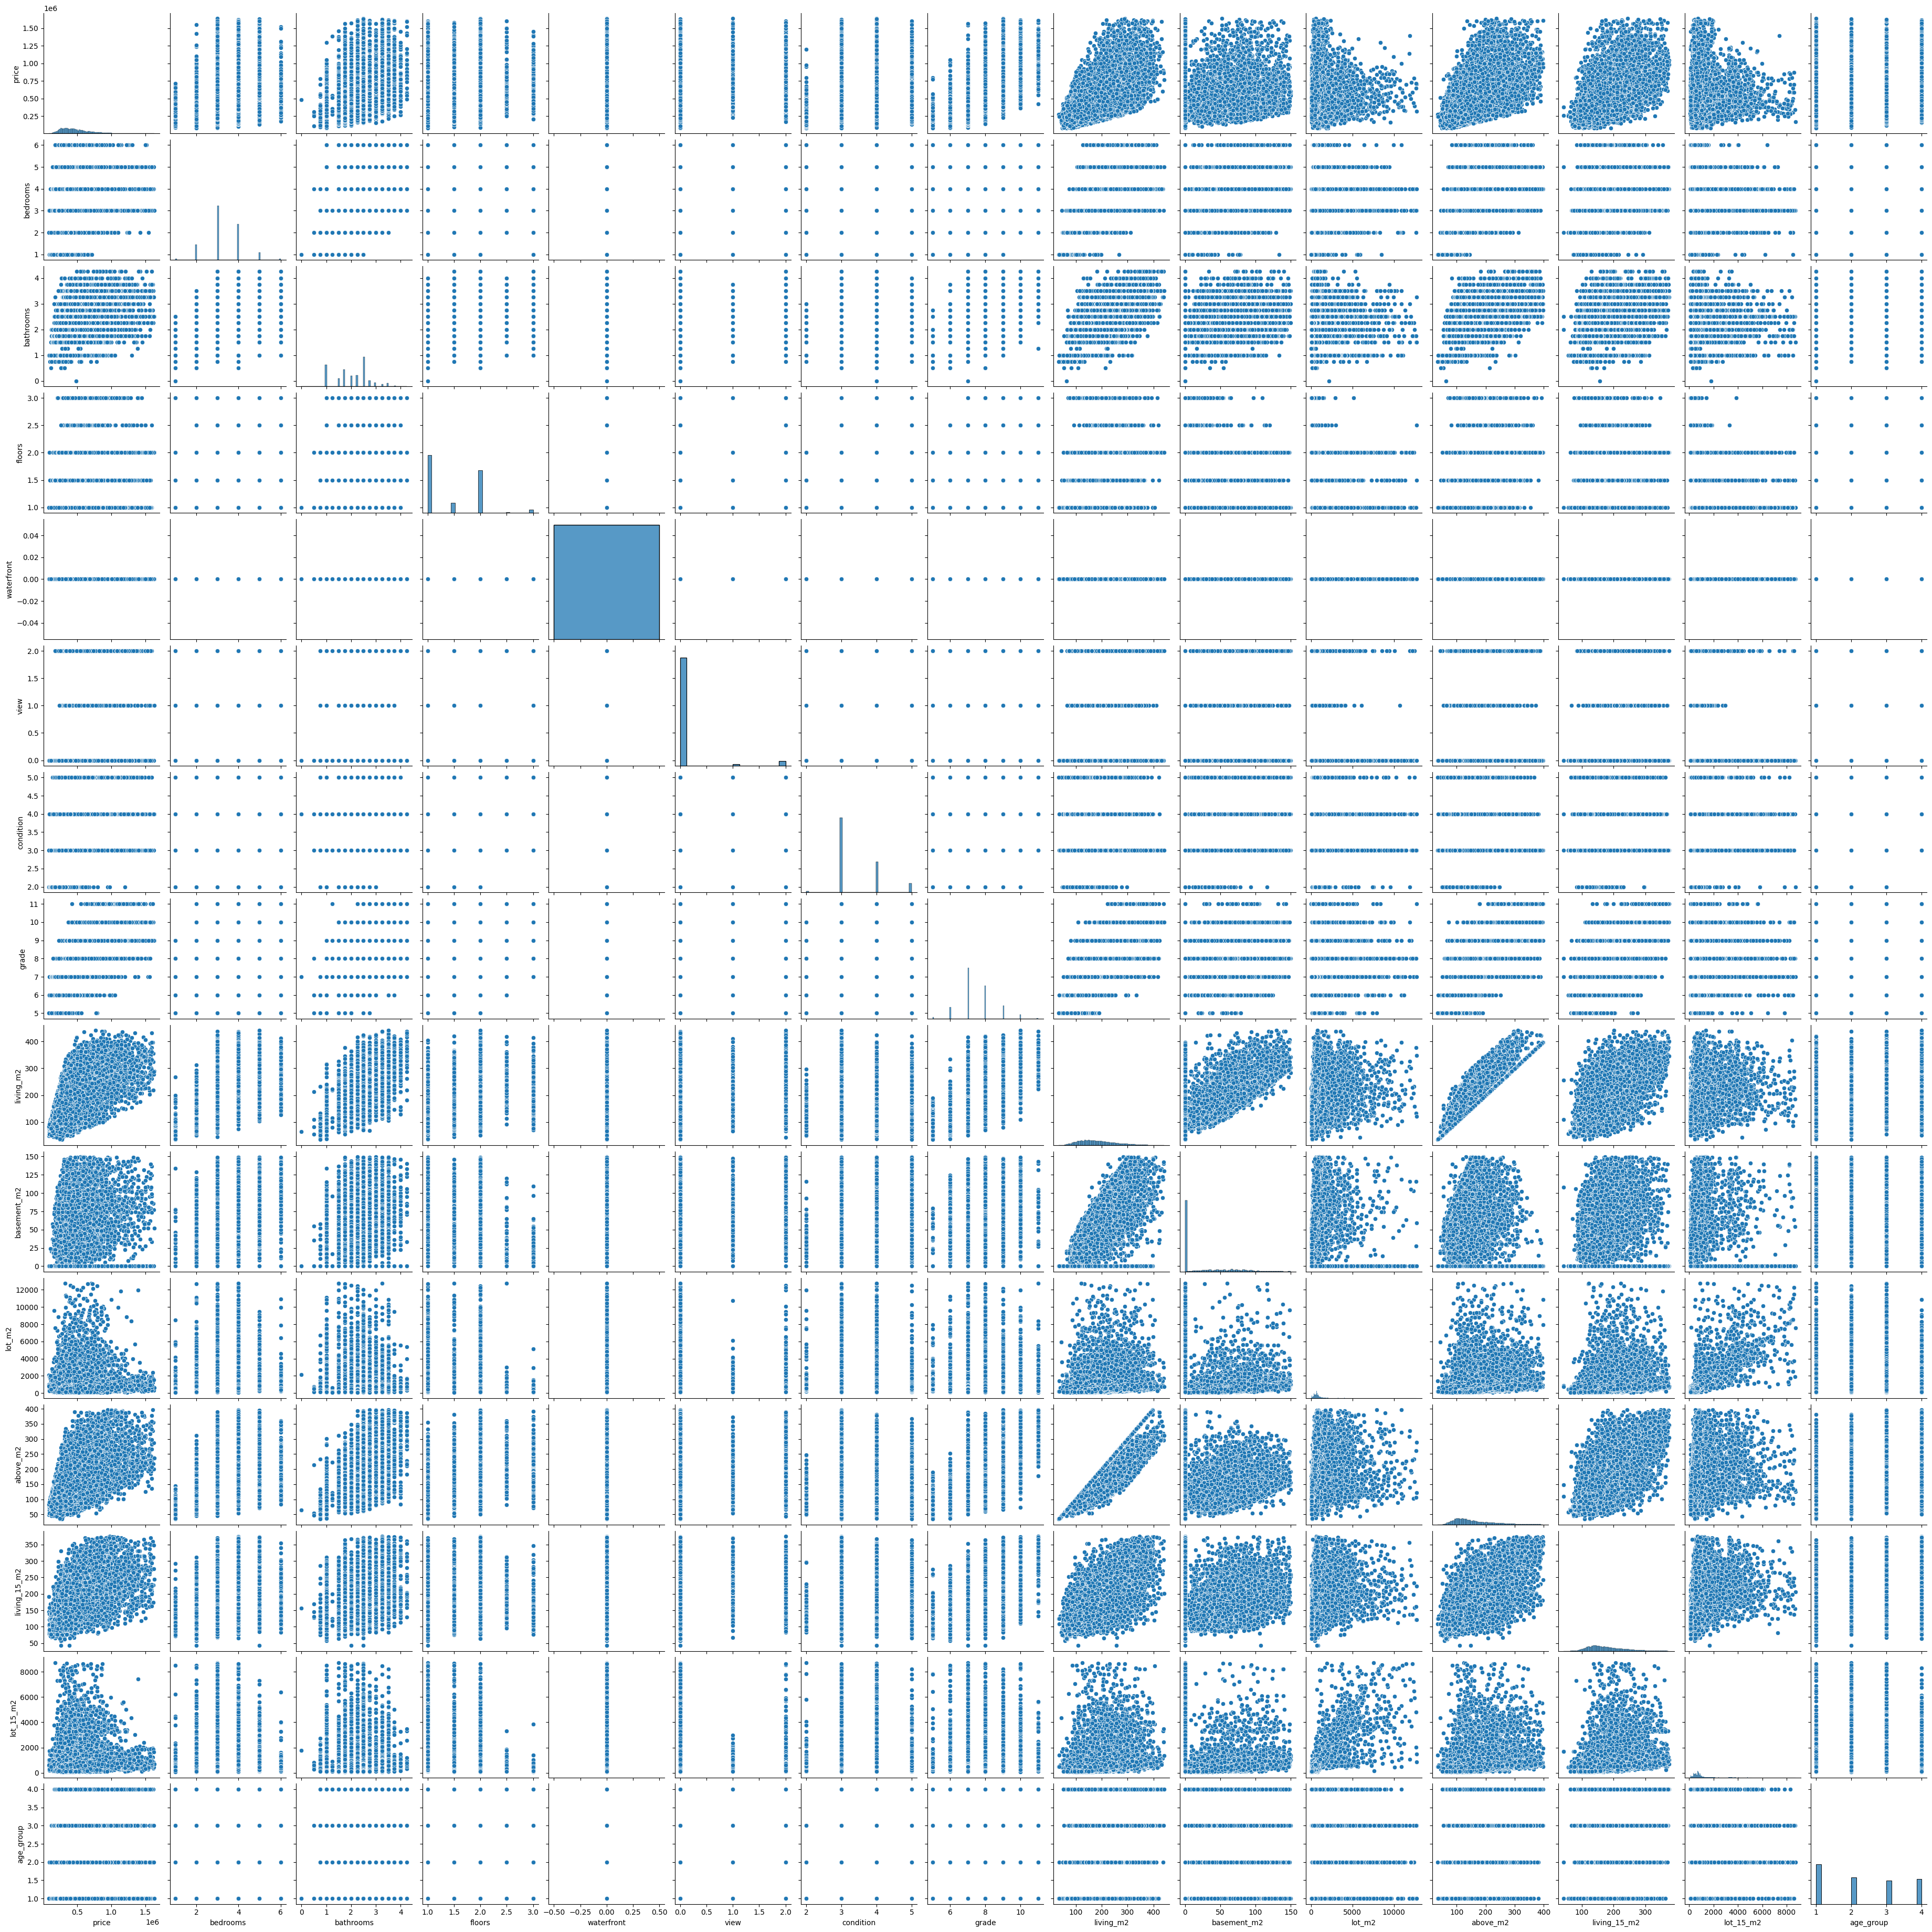

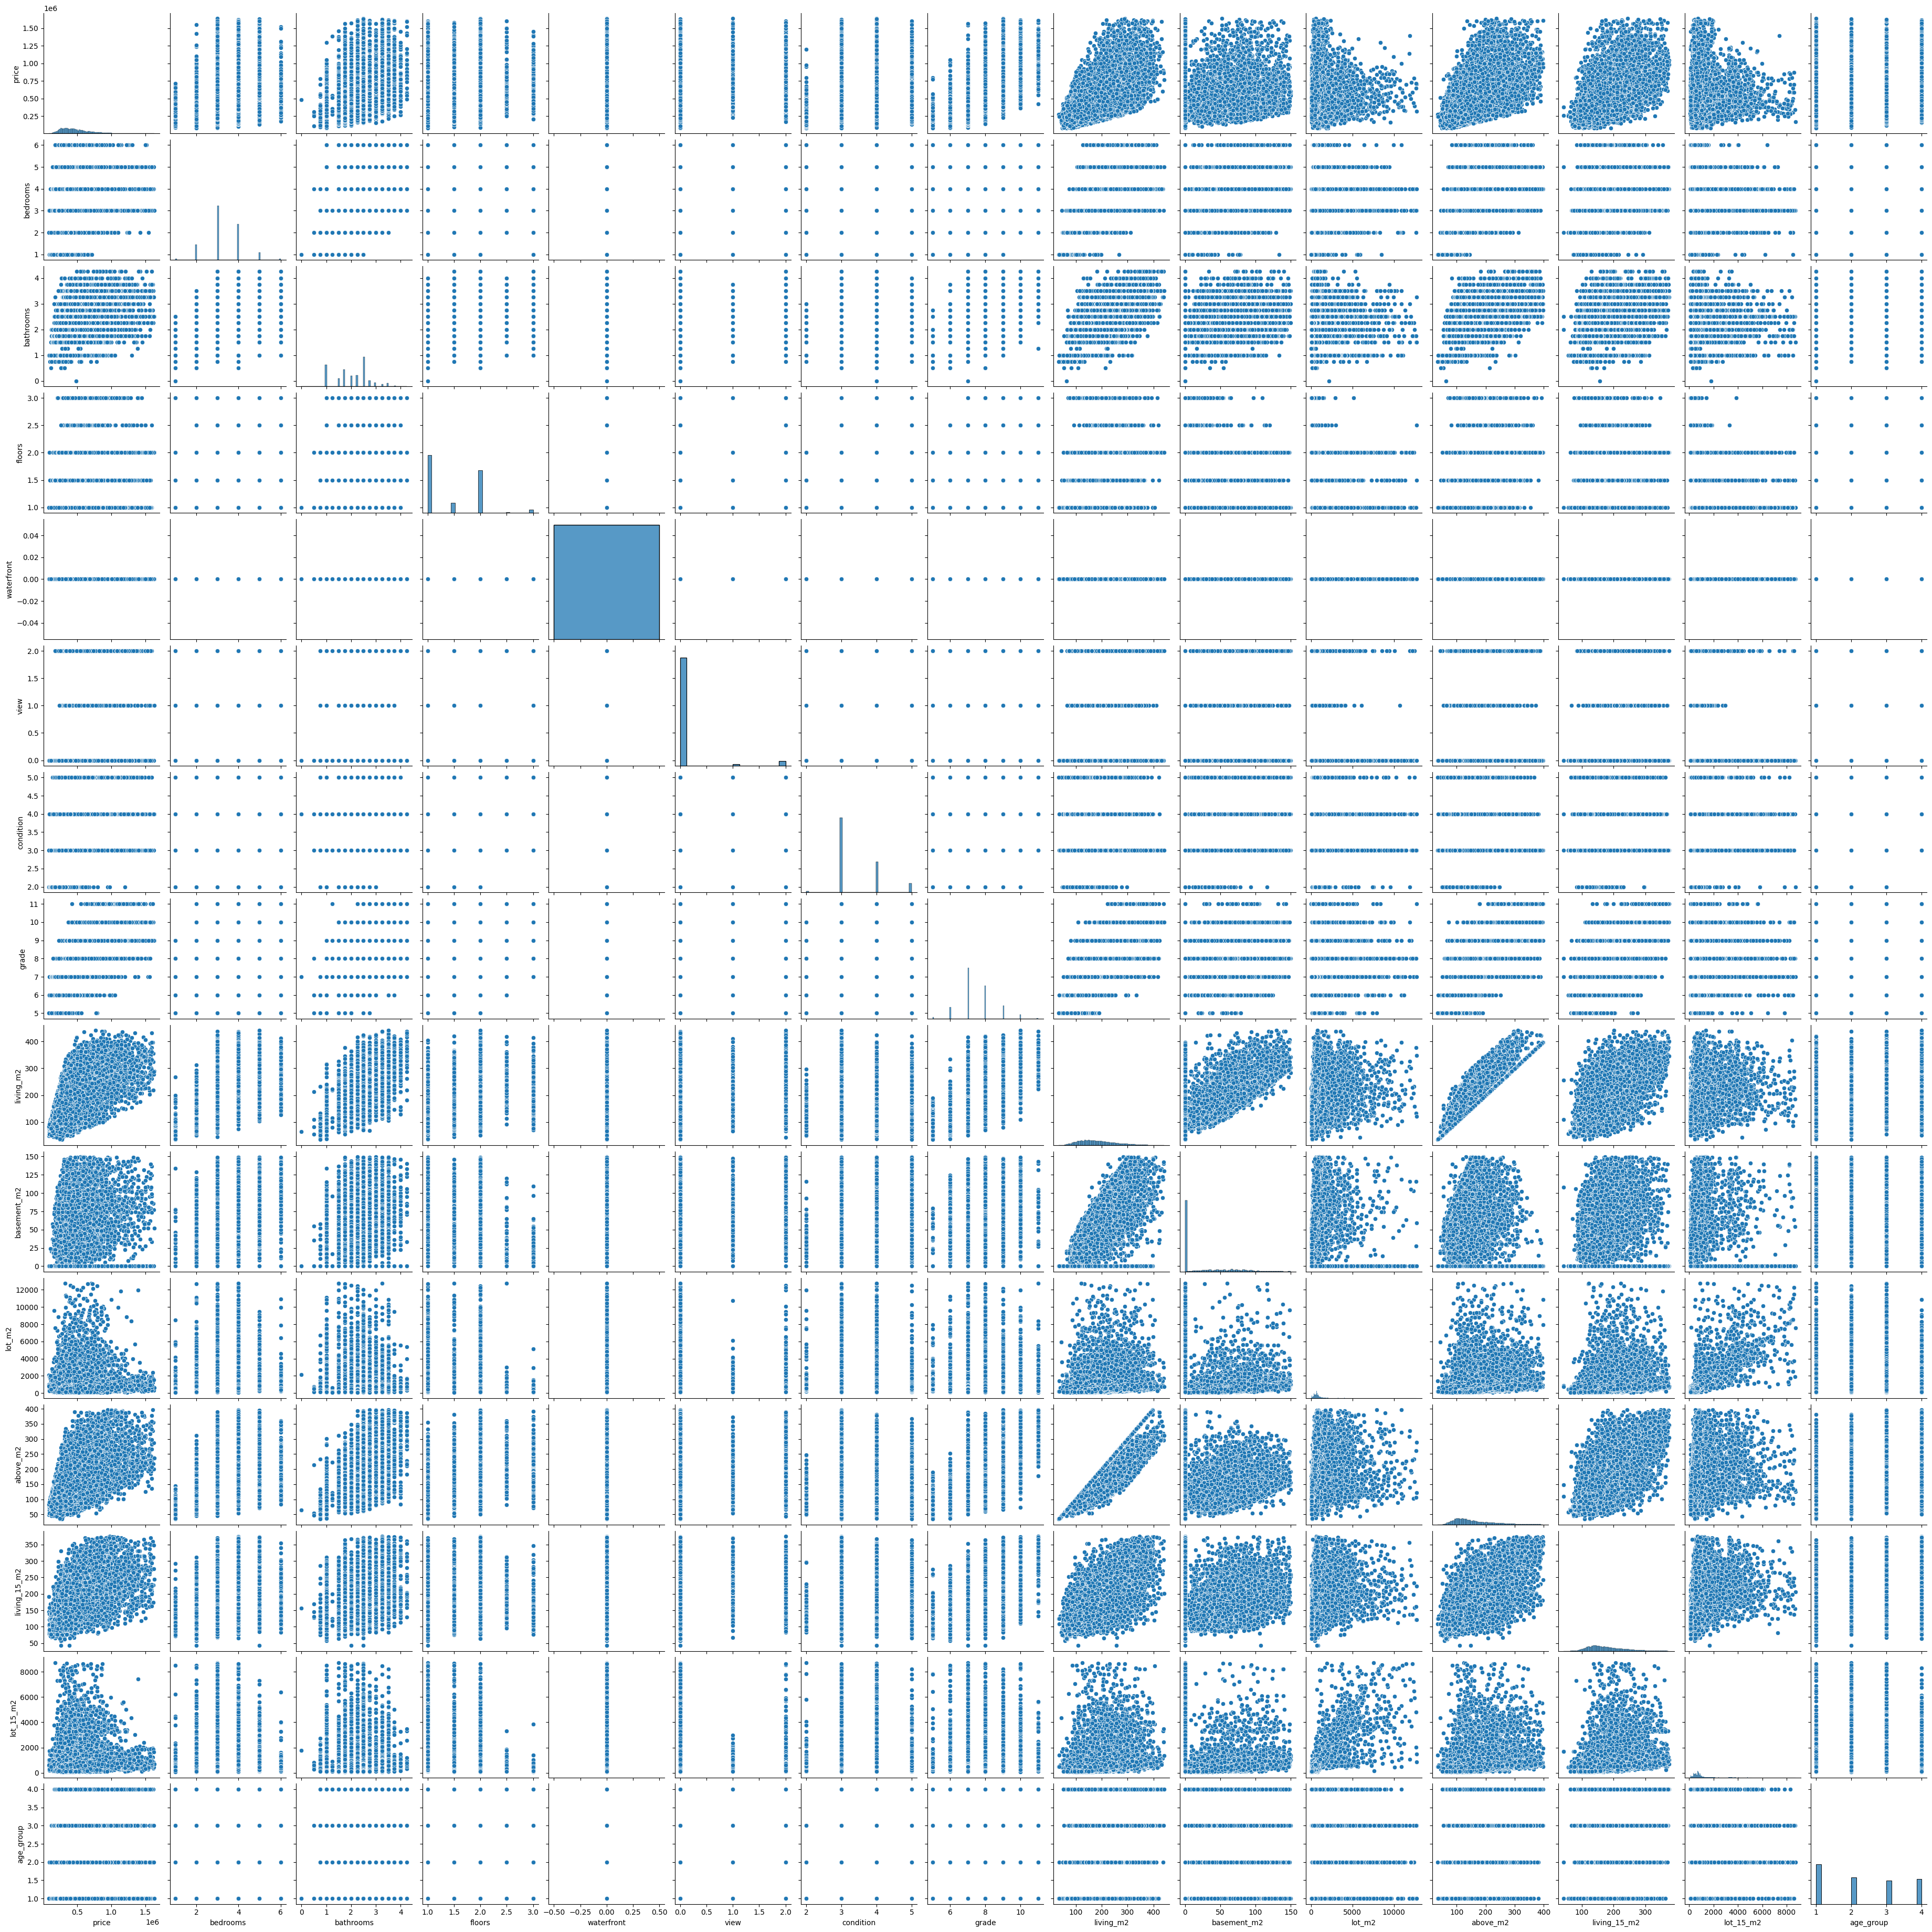

In [21]:
# this shows nothing
sns.pairplot(df)
plt.show()

In [27]:
# too many columms
df = df.drop("waterfront", axis = 1)
df = df.drop("view", axis = 1)

df = df.drop("lot_m2", axis = 1)
df = df.drop("lot_15_m2", axis = 1)
df = df.drop("condition", axis = 1)

# we need to create a sample of data
sample = df.sample(3000)

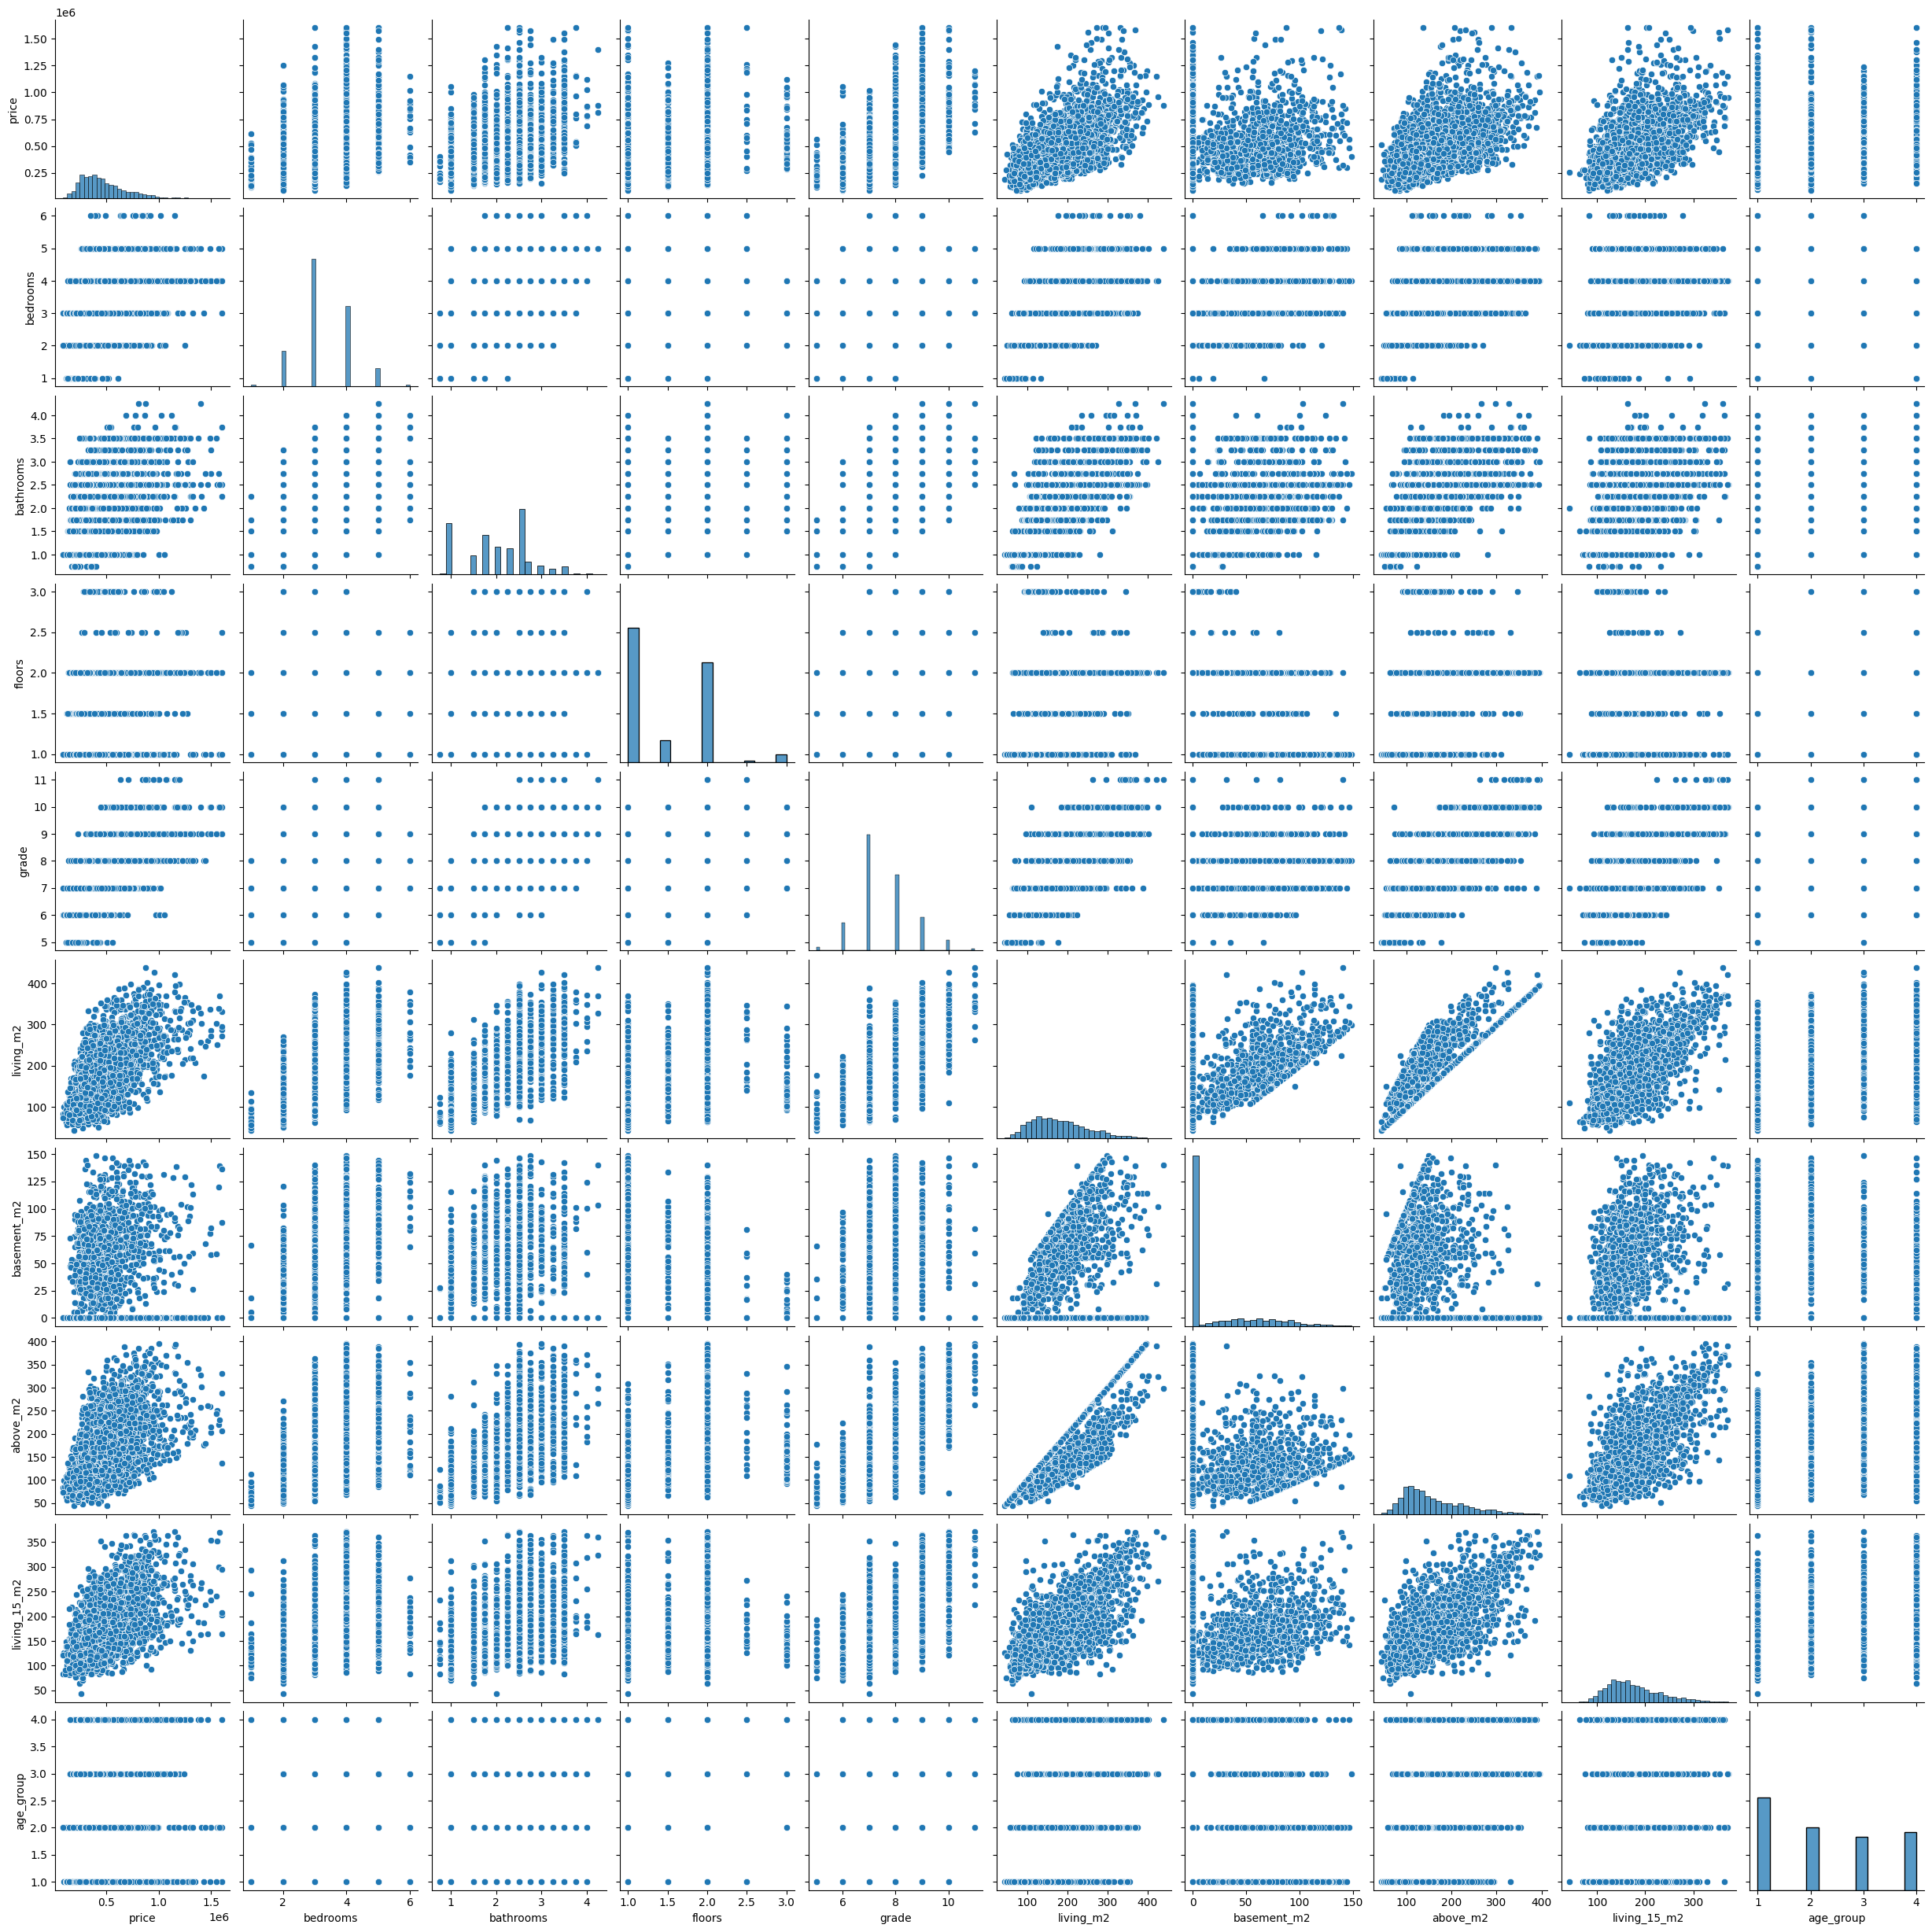

In [31]:
sns.pairplot(sample)
plt.show()

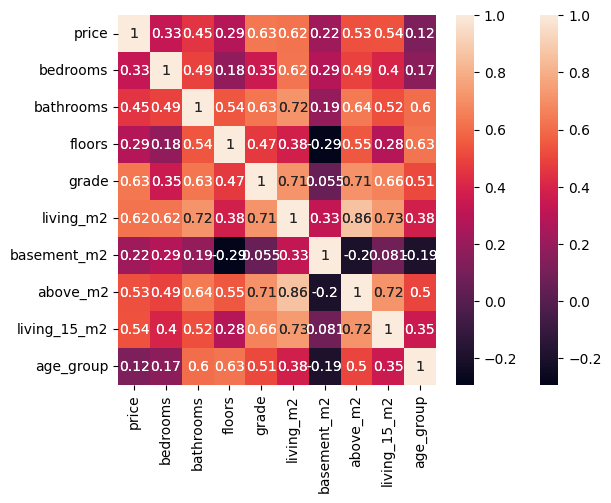

In [30]:
sns.heatmap(sample.corr(numeric_only=True), annot = True)
plt.show()